In [129]:
# ----- doing all the necessary imports -----
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import HTML
import numpy as np

import base64


In [130]:
# ----- initialising the constants -----
# length of the system
L = 1.0  

# discrete spatial stepsize
dx = 0.01  

# wave speed
c = 1.0  

In [131]:
# ----- choosing a time step to satisfy the CFL condition -----
dt = 0.707 * dx / c  # time step satisfying the CFL condition

# ----- defining the arrays that store positions -----
x = np.arange(0, L * (1 + dx), dx)
y = np.arange(0, L * (1 + dx), dx)

xx, yy = np.meshgrid(x, y)

In [132]:
npts = len(x)  # number of spatial points
nsteps = 199  # number of time steps

In [133]:
f = np.zeros((npts, npts, 3))

# Initial condition: Gaussian pulse
xc = 0.5  # center of the system
w = 0.05  # width of the Gaussian wave pulse
f[:, :, 0] = np.exp(-(xx - xc) ** 2 / w ** 2) * np.exp(-(yy - xc) ** 2 / w ** 2)

In [134]:
# first time step in the leapfrog algorithm
f[1:-1, 1:-1, 1] = (
        f[1:-1, 1:-1, 0]
        + 0.5 * c ** 2 * (f[:-2, 1:-1, 0] + f[2:, 1:-1, 0] - 2 * f[1:-1, 1:-1, 0]) * (dt ** 2 / dx ** 2)
        + 0.5 * c ** 2 * (f[1:-1, :-2, 0] + f[1:-1, 2:, 0] - 2 * f[1:-1, 1:-1, 0]) * (dt ** 2 / dx ** 2)
)

Text(0.5, 0.5, 'y')

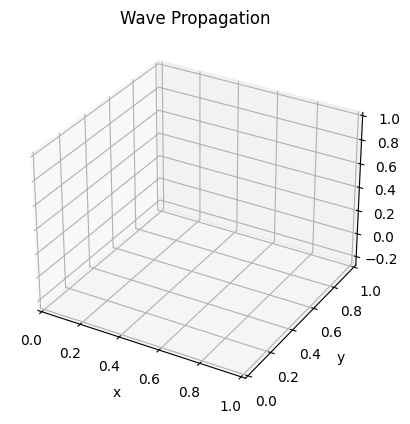

In [135]:
# Set up the plot
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
# plot_elements = [  # Use a mutable container to hold plot elements
#     ax.plot_surface(xx, yy, f[:, :, 0], cmap=matplotlib.cm.coolwarm, rstride=1, cstride=1),
#     ax.plot_wireframe(xx, yy, f[:, :, 0], rstride=10, cstride=10, linewidth=0),
# ]

plot_elements = [None, None]  # Ensure `plot_elements` is always defined as a list
ax.set_zlim(-0.25, 1)
ax.set_title("Wave Propagation")
ax.set_xlabel("x")
ax.set_ylabel("y")


In [136]:
# Update function for animation
def update(frame):
    global f
    # Leapfrog algorithm
    f[1:-1, 1:-1, 2] = (
        -f[1:-1, 1:-1, 0]
        + 2 * f[1:-1, 1:-1, 1]
        + c**2 * (f[:-2, 1:-1, 1] + f[2:, 1:-1, 1] - 2 * f[1:-1, 1:-1, 1]) * (dt**2 / dx**2)
        + c**2 * (f[1:-1, :-2, 1] + f[1:-1, 2:, 1] - 2 * f[1:-1, 1:-1, 1]) * (dt**2 / dx**2)
    )

    # Update for next time step
    f[:, :, 0] = f[:, :, 1]
    f[:, :, 1] = f[:, :, 2]

    # Remove and update the plot
    # for element in plot_elements:
    #     element.remove()
    #     
    if plot_elements[0]:
        plot_elements[0].remove()
    if plot_elements[1]:
        plot_elements[1].remove()
        
    plot_elements[0] = ax.plot_surface(xx, yy, f[:, :, 2], cmap=matplotlib.cm.coolwarm, rstride=1, cstride=1)
    plot_elements[1] = ax.plot_wireframe(xx, yy, f[:, :, 2], rstride=10, cstride=10, color=(0, 0, 0), linewidth=0)
    ax.set_title(f"t = {frame * dt:.2f}")
    
    print(f"Processing frame {frame}")

    return plot_elements

In [137]:
# Create animation
ani = FuncAnimation(fig, update, frames=nsteps, interval=50, blit=False)
writer = matplotlib.animation.PillowWriter(fps=15, metadata=dict(artist="Me"), bitrate=1800)
ani.save("scatter.gif", writer=writer)

Processing frame 0
Processing frame 0
Processing frame 1
Processing frame 2
Processing frame 3
Processing frame 4
Processing frame 5
Processing frame 6
Processing frame 7
Processing frame 8
Processing frame 9
Processing frame 10
Processing frame 11
Processing frame 12
Processing frame 13
Processing frame 14
Processing frame 15
Processing frame 16
Processing frame 17
Processing frame 18
Processing frame 19
Processing frame 20
Processing frame 21
Processing frame 22
Processing frame 23
Processing frame 24
Processing frame 25
Processing frame 26
Processing frame 27
Processing frame 28
Processing frame 29
Processing frame 30
Processing frame 31
Processing frame 32
Processing frame 33
Processing frame 34
Processing frame 35
Processing frame 36
Processing frame 37
Processing frame 38
Processing frame 39
Processing frame 40
Processing frame 41
Processing frame 42
Processing frame 43
Processing frame 44
Processing frame 45
Processing frame 46
Processing frame 47
Processing frame 48
Processing 


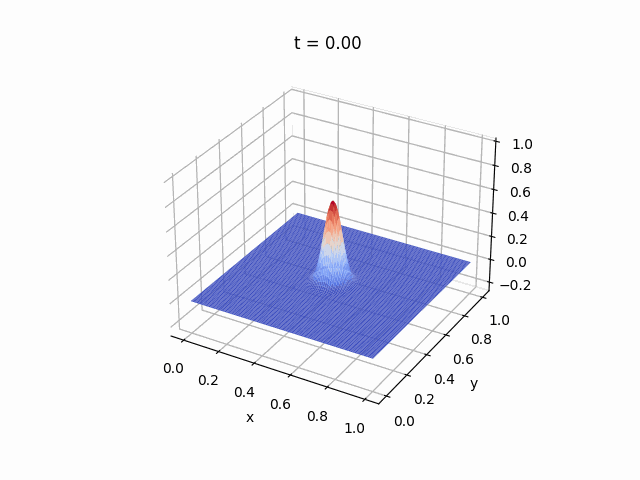

In [138]:
b64 = base64.b64encode(open("scatter.gif",'rb').read()).decode('ascii')
display(HTML(f'<img src="data:image/gif;base64,{b64}" style="width: 50%;">/>'))